In [58]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
#import wquantiles

import seaborn as sns
import matplotlib.pylab as plt # why pylab and not pyplot????

import warnings # To suppress some warnings
 
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [3]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

# Estimates of Location
## Example: Location Estimates of Population and Murder Rates

In [4]:
state = pd.read_csv('state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [5]:
state['Population'].mean()

6162876.3

In [6]:
# this drop 10% of records from each end
trim_mean(state["Population"],0.1)

4783697.125

In [7]:
state['Population'].median()

4436369.5

In [8]:
# weighted mean
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

# Estimates of Variability

In [9]:
state['Population'].std()

6848235.347401142

In [10]:
state['Population'].quantile(0.75)-state['Population'].quantile(0.25)

4847308.0

In [11]:
robust.scale.mad(state['Population'])

3849876.1459979336

## Percentiles and Boxplots

In [12]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

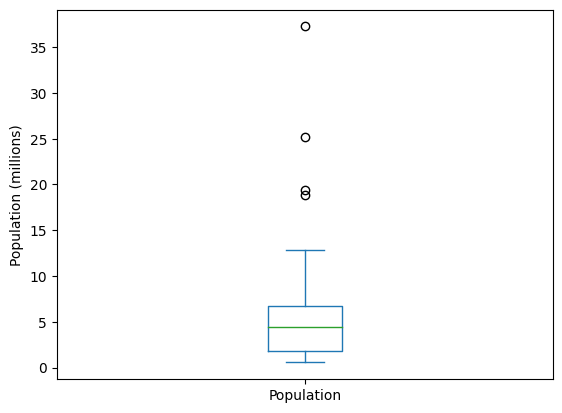

In [13]:
ax  =(state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

In [14]:
binnedPopulation = pd.cut(state['Population'],10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0.5, 0, 'Population (millions)')

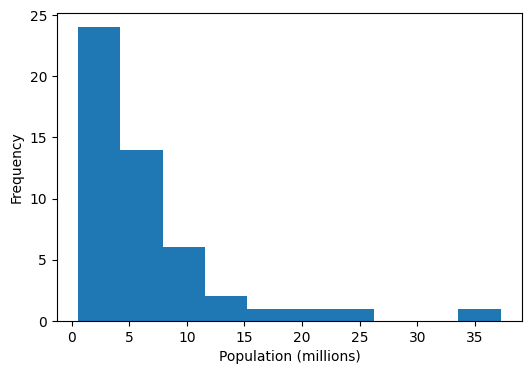

In [15]:
ax = (state["Population"]/1_000_000).plot.hist(figsize=(6,4))
ax.set_xlabel("Population (millions)")

Text(0.5, 0, 'Murder Rate (per 100,000)')

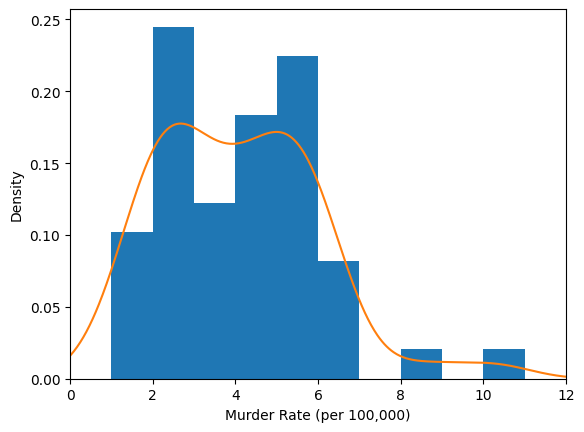

In [16]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state["Murder.Rate"].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

In [17]:
dfw = pd.read_csv('dfw_airline.csv')

In [18]:
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [19]:
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


Text(0, 0.5, 'Count')

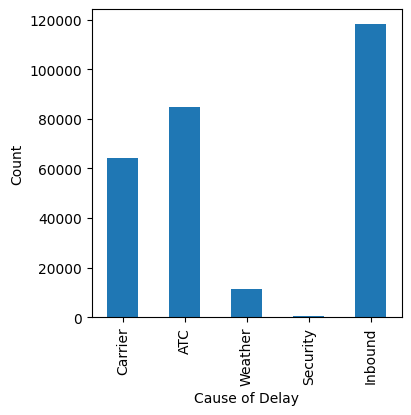

In [20]:
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel("Cause of Delay")
ax.set_ylabel("Count")

## Correlation

In [21]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\timry\\OneDrive\\Documents\\Practical_Statistics_For_Data_Scientists\\practical-statistics-for-data-scientists-master\\My_Folder\\data\\sp500_sectors.csv'

In [ ]:
sp500_sym = pd.read_csv('sp500_sectors.csv')
sp500_sym.head()

In [ ]:
sp500_px = pd.read_csv('sp500_data.csv.gz', index_col=0)
sp500_px.head()

In [ ]:
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecomSymbols

In [ ]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

In [ ]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

In [ ]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                   sp500_sym[sp500_sym['sector']=='etf']['symbol']]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
           cmap=sns.diverging_palette(20,220, as_cmap=True))

In [22]:
ax = telecom.plot.scatter(x="T", y="VZ", figsize=(4,4), marker = '$\u25EF$')
ax.set_xlabel("ATT (T)")
ax.set_ylabel("Verizon (VZ)")
ax.axhline(0, color="grey", lw=1)
ax.axvline(0, color="grey", lw=1)

NameError: name 'telecom' is not defined

# Exploring Two or More Variables

In [23]:
kc_tax = pd.read_csv('kc_tax.csv.gz')
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [24]:
kc_tax0= kc_tax.loc[(kc_tax["TaxAssessedValue"] < 750000) &
                    (kc_tax["SqFtTotLiving"] > 100) &
                    (kc_tax["SqFtTotLiving"] < 3500), :
                   ]
kc_tax0.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


In [25]:
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax-ASsessed Value')

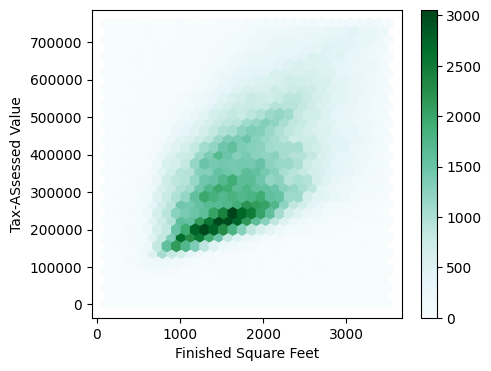

In [26]:
ax = kc_tax0.plot.hexbin(x="SqFtTotLiving", y="TaxAssessedValue",
                         gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel("Finished Square Feet")
ax.set_ylabel("Tax-ASsessed Value")

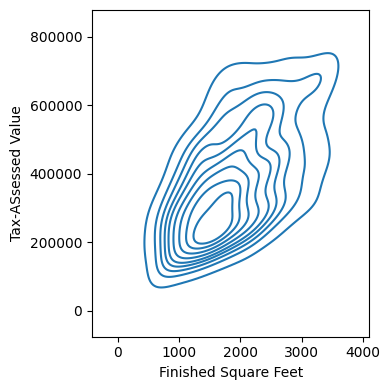

In [32]:
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.kdeplot(data=kc_tax0.sample(1000), x="SqFtTotLiving", y="TaxAssessedValue", ax=ax)
ax.set_xlabel("Finished Square Feet")
ax.set_ylabel("Tax-ASsessed Value")
plt.tight_layout()
plt.show()

## Two Categorical Variables
Load the `lc_loans` dataset

In [33]:
lc_loans = pd.read_csv('lc_loans.csv')
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [37]:
crosstab = lc_loans.pivot_table(
    index="grade",
    columns = "status",
    aggfunc=lambda x: len(x), margins=True)

print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [39]:
df = crosstab.loc['A':'G',:].copy()
df.loc[:,"Charged Off":"Late"] = df.loc[:,"Charged Off":"Late"].div(df['All'], axis=0)
df["All"]=df["All"]/sum(df["All"])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


C:\Users\timry\AppData\Local\Temp\ipykernel_20256\261253648.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,"Charged Off":"Late"] = df.loc[:,"Charged Off":"Late"].div(df['All'], axis=0)
C:\Users\timry\AppData\Local\Temp\ipykernel_20256\261253648.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,"Charged Off":"Late"] = df.loc[:,"Charged Off":"Late"].div(df['All'], axis=0)
C:\Users\timry\AppData\Local\Temp\ipykernel_20256\261253648.py:2: FutureWarning: Setting an item of incompatible dtype 

## Categorical and Numeric Data

In [40]:
airline_stats = pd.read_csv('airline_Stats.csv')
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


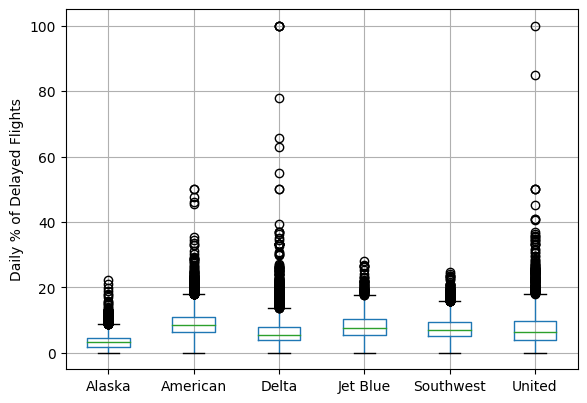

In [55]:
ax = airline_stats.boxplot(by="airline", column="pct_carrier_delay")
ax.set_xlabel("")
ax.set_ylabel("Daily % of Delayed Flights")
plt.title('')
plt.suptitle('')
plt.show()

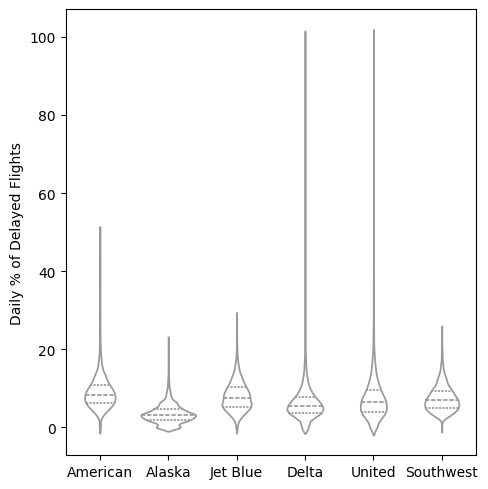

In [59]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

In [61]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


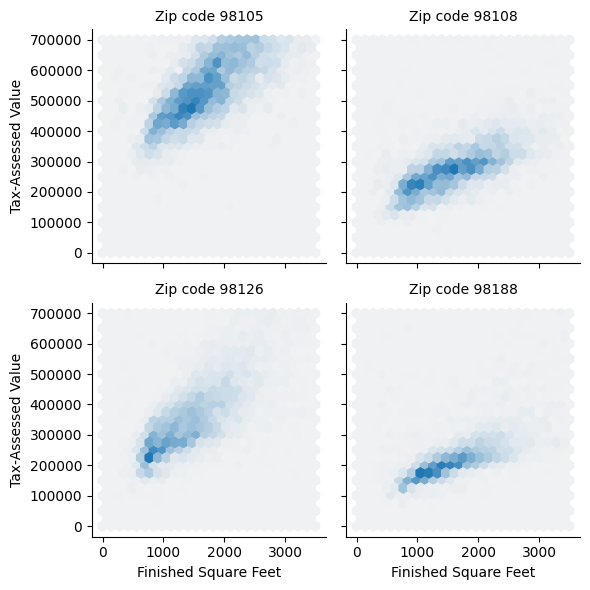

In [66]:
def hexbin(x,y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x,y,gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
    extent=[0,3500,0,700000])
g.set_axis_labels('Finished Square Feet','Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')
plt.show()